<a href="https://colab.research.google.com/github/Akshay4al/OIBSIP_TASK1/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict customer churn based on customer demographics, account information, and service usage patterns.**bold text**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.shape

(7043, 21)

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


TotalCharges is an object data type convert that to integer type


In [20]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'].dtype

dtype('float64')

In [21]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# **Exploratory Data Analysis**

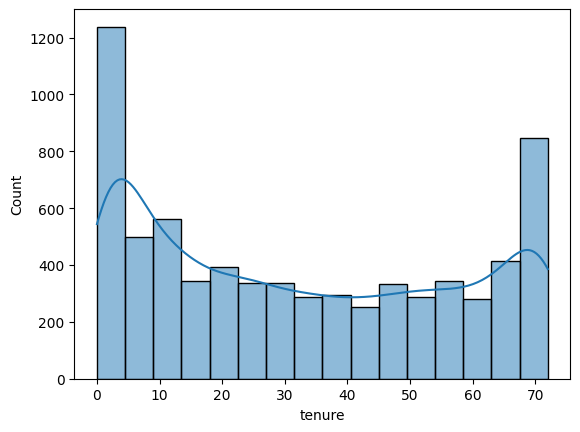

In [23]:
sns.histplot(data['tenure'],kde=True)
plt.show()

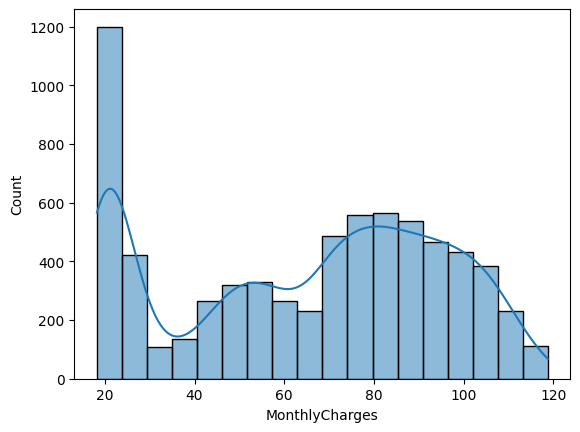

In [24]:
sns.histplot(data['MonthlyCharges'],kde=True)
plt.show()

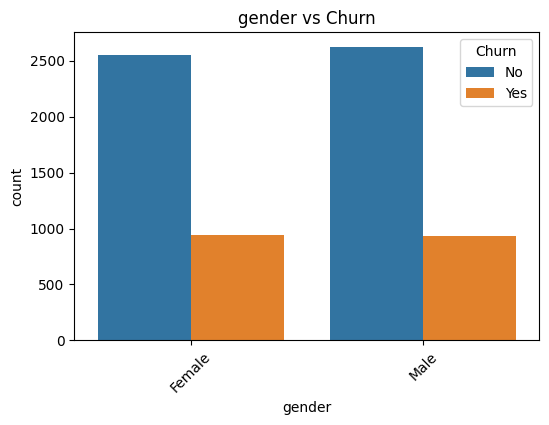

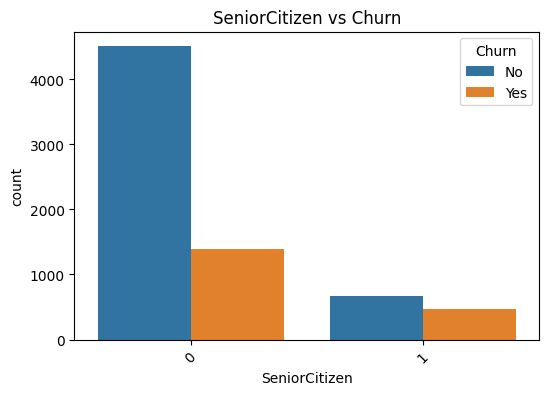

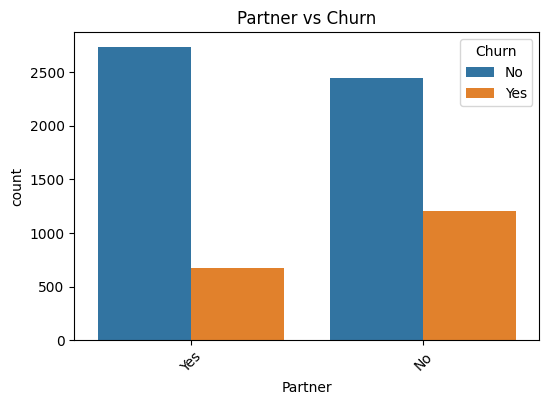

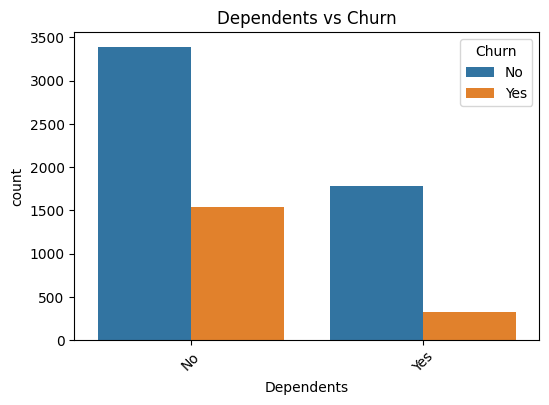

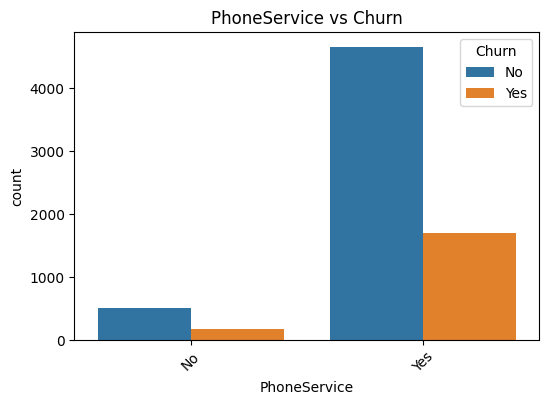

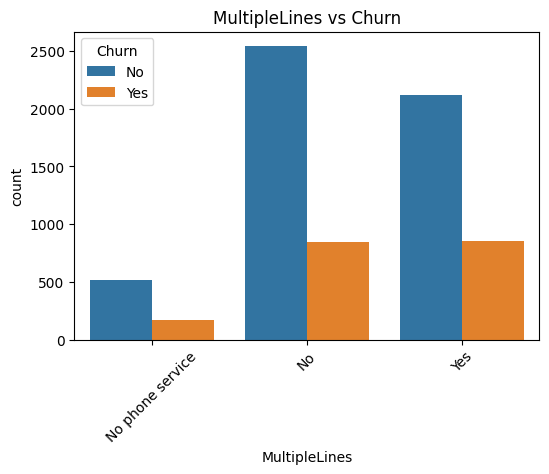

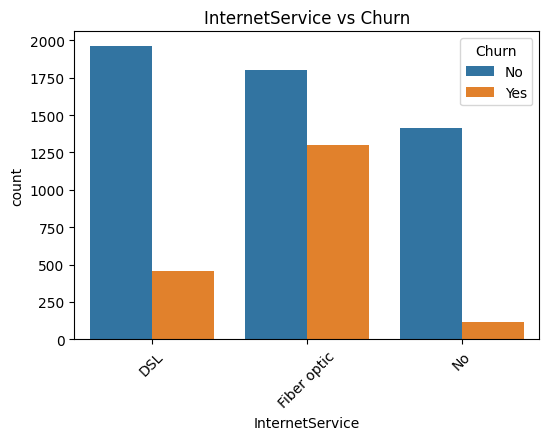

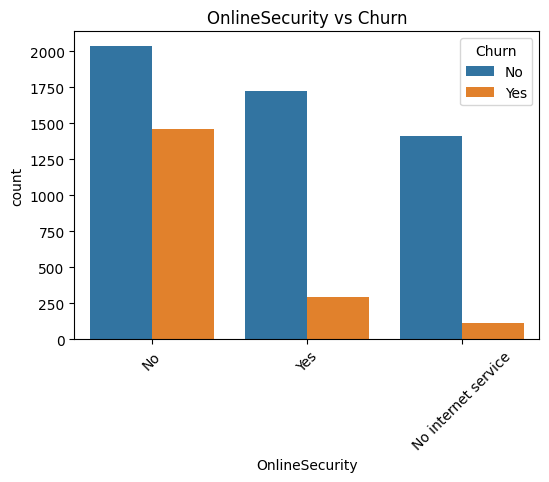

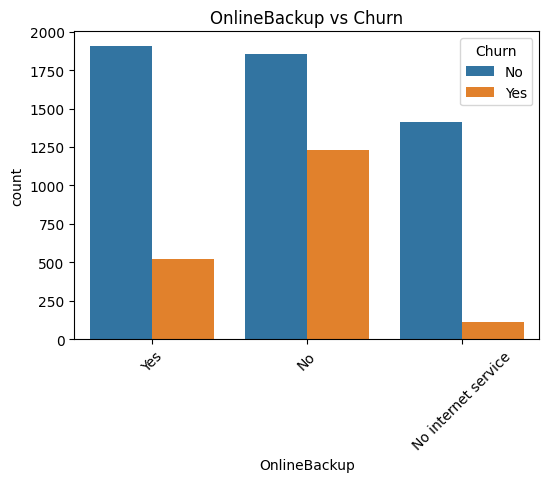

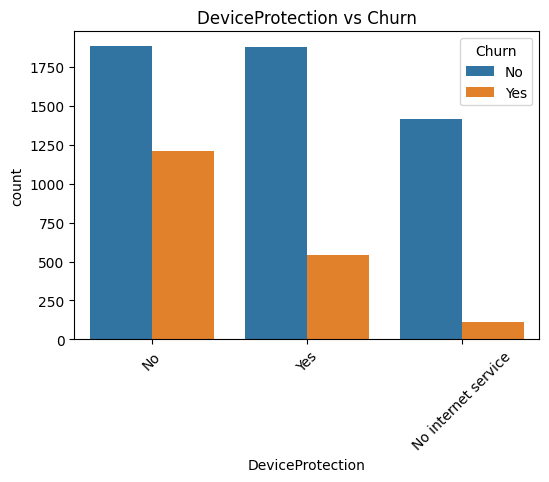

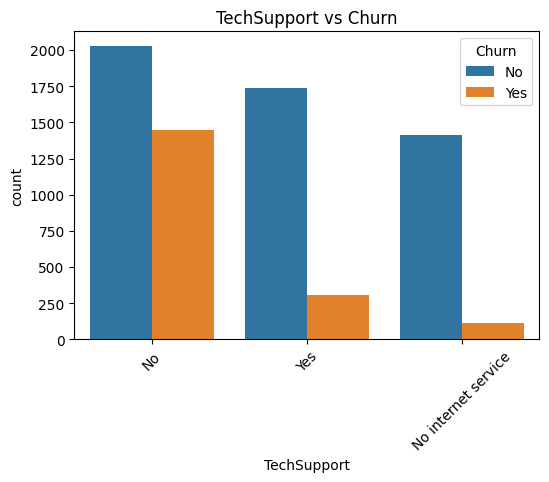

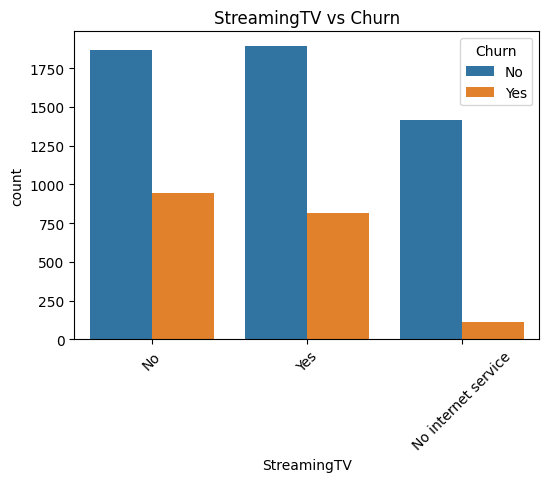

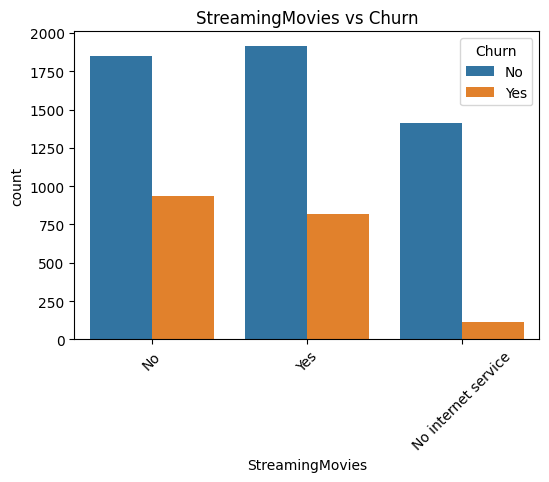

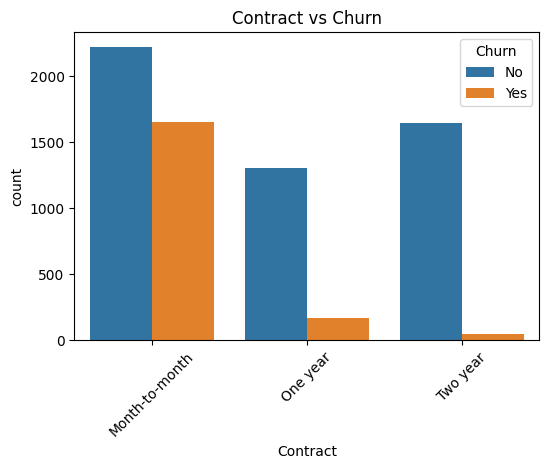

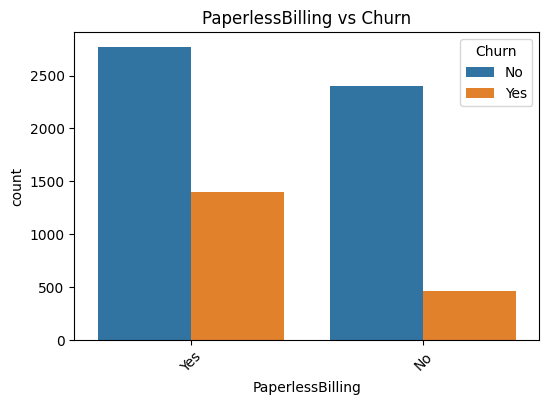

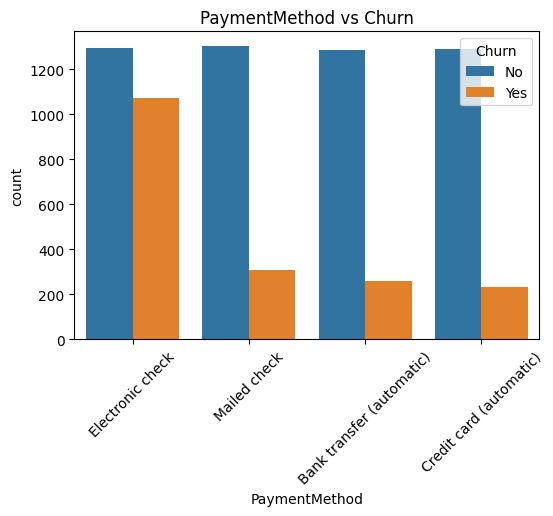

In [25]:
# Plot categorical features vs churn
categorical_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
                    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                    'Contract','PaperlessBilling','PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Insights from Categorical Features vs Churn
'''1. Gender VS Churn
  Both genders have almost equal churn so gender is not strong predictor of churn.
2.SeniorCitizen VS Churn
  Seniorcitizen shows the higest churn rate
3.parther VS Churn
  Customers without a partner tend to churn more
4.Dependents vs Churn
  Customers who are not depended have more churn
5.PhoneService vs Churn
  both user and non user have churn not able to say
6.MultipleLines vs Churn
  mixed result
7.InternetService vs Churn
  Fiber optic users churn more compared to DSL users.
8.OnlineSecurity vs Churn
  Customers without online security churn more.
9.OnlineBackup vs Churn
  Customers without backup services show higher churn.
10.DeviceProtection vs Churn
  No device protection have more churn
11.TechSupport vs Churn
  Customers without tech support have more churn.
12.StreamingTV vs Churn
  Both streamingTV and nonstreaming have churn but nonstreaming have little more
13.Streaming Movies vs Churn
  same as streaming Tv
14.Contract vs Churn
  Month-to-month contracts churn the most
15.PaperlessBilling vs Churn
  Customers with paperless billing churn more.
16.PaymentMethod vs Churn
  Electronic check payments churn the most.'''

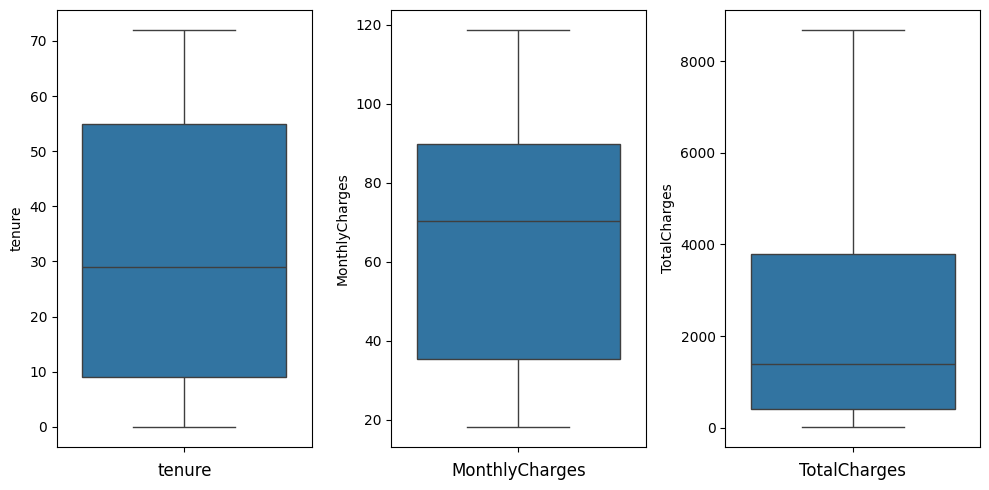

In [33]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plot=1
plt.figure(figsize=(10,5))
for col in numerical_cols:
  if plot<=3:
    ax=plt.subplot(1,3,plot)
    sns.boxplot(data[col])
    plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()


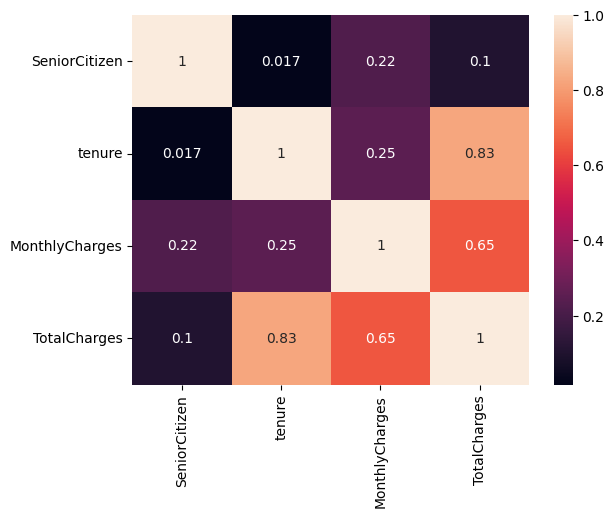

In [37]:
numeric_data = data.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_data.corr(),annot=True)
plt.show()